In [1]:
import io                           # benötigt zur Einbindung der Plots in Ausgabe
import matplotlib.pyplot as plt     # für Zeichnen der Plots
import seaborn as sns               # für schöneres Zeichnen der Plots
sns.set_theme(style="darkgrid")     # dunklerer Hintergrund

from static_functions import verify_input, displacement_method, support_loadings, nodal_moments
from static_functions import max_moments, plot_moments, plot_shear_forces, draw_summary

# Eingabe
Mehrfeldträger mit feldweiser konstanter Gleichstreckenlast und Weg- bzw. Drehfedern an allen Auflagern

In [17]:
L = [5, 5, 5, 5,]
EI = [10000, 10000, 10000, 10_000,]
P = [10, 10, 10, 10,]

C_N = [1_000, 1_000, 1_000, 1_000, 1_000,]
C_M = [0, 0, 0, 0, 0,]

## Kalkulation

In [18]:
verify_input(L, EI, P, C_N, C_M)
result = displacement_method(L, EI, P, C_N, C_M)
support_forces, support_moments = support_loadings(result, L)
inner_moments = nodal_moments(result, L)
maximum_moments = max_moments(result, L, P)

Input successfully passed checks


# Ausgabe

In [19]:
for i, (F, M) in enumerate(zip(support_forces, support_moments)):
    print(f"C: {F}\t\t M: {M}")
    if i < len(L):
        print(f"\t\t\t\t\t\t\t M_l:   {inner_moments[i*2]}")
        print(f"\t\t\t\t\t\t\t M_max: {maximum_moments[i]}")
        print(f"\t\t\t\t\t\t\t M_r:   {inner_moments[i*2+1]}")
    
print("")


C: 22.702680614579926		 M: 0.0
							 M_l:   -1.0658141036401503e-14
							 M_max: 25.77058535438115
							 M_r:   -11.486596927100347
C: 50.34651847008828		 M: 0.0
							 M_l:   -11.486596927100324
							 M_max: 15.076681995133148
							 M_r:   -21.240601503759404
C: 53.90160183066363		 M: 0.0
							 M_l:   -21.240601503759454
							 M_max: 15.076681995133104
							 M_r:   -11.486596927100312
C: 50.34651847008828		 M: 0.0
							 M_l:   -11.486596927100344
							 M_max: 25.770585354381282
							 M_r:   -7.105427357601002e-15
C: 22.702680614579933		 M: 0.0



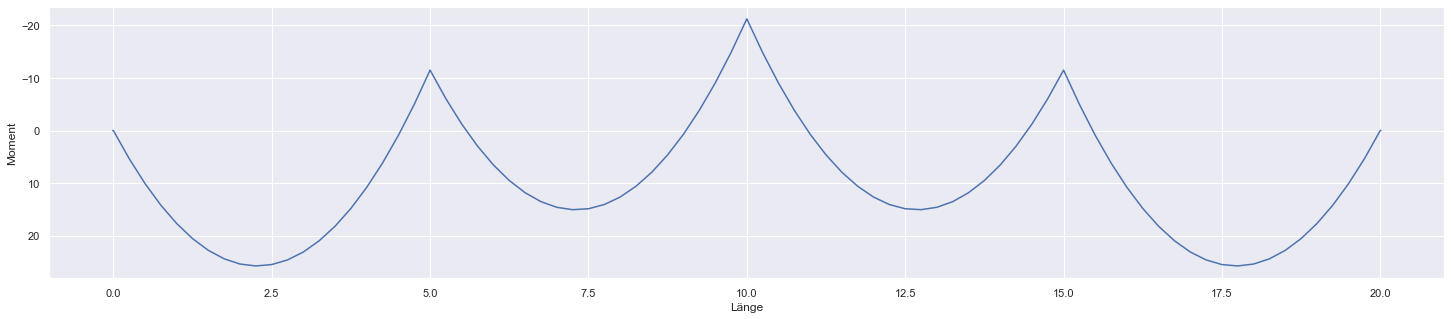

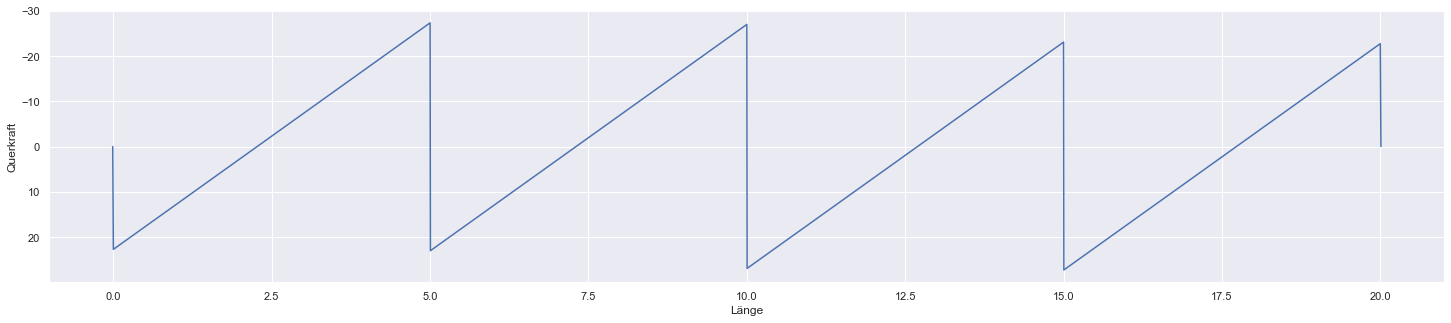

In [21]:
plt.figure(figsize=((len(L)+1)*5,5))
mom_plot = plot_moments(result, L, P)
mom_buf = io.BytesIO()
plt.savefig(mom_buf, bbox_inches = "tight")
mom_buf.seek(0)
mom_plot
plt.show()

plt.figure(figsize=((len(L)+1)*5,5))
shear_plot = plot_shear_forces(result, L, P)
shear_buf = io.BytesIO()
plt.savefig(shear_buf, bbox_inches = "tight")
shear_buf.seek(0)
shear_plot
plt.show()

# Zusammenstellung

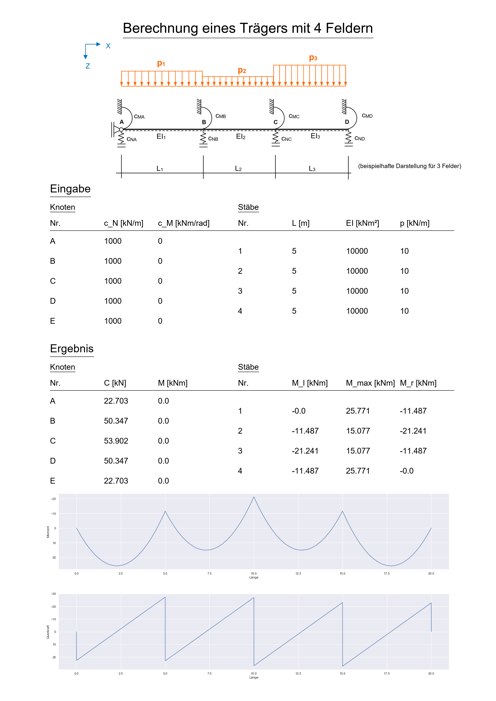

In [22]:
image = draw_summary(result, L, EI, P, C_N, C_M, "system.png", mom_buf, shear_buf)
image.resize((int(image.size[0]/5), int(image.size[1]/5)))

In [23]:
#image.save("displace.png", dpi=(300,300))